<a href="https://colab.research.google.com/github/KoJl9lH-59rus/ML_KT/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

Для лабораторной работы по визуализации взят набор данных "Heart Disease Dataset".

Этот набор данных датируется 1988 годом и состоит из четырех баз данных: Cleveland, Hungary, Switzerland и Long Beach V. Он содержит 76 атрибутов, включая прогнозируемый атрибут, но все опубликованные эксперименты ссылаются на использование подмножества из 14 из них. Поле «target» относится к наличию у пациента заболевания сердца. Оно имеет целочисленное значение 0 = нет заболевания и 1 = заболевание.

In [49]:
url = 'https://raw.githubusercontent.com/KoJl9lH-59rus/ML_KT/refs/heads/main/%D0%9A%D0%A21/content/heart.csv'

dataset = pd.read_csv(url)

In [12]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* **age**: возраст пациента.
* **sex**: пол пациента (1 = мужской, 0 = женский).
* **cp**: тип испытываемой боли в груди (от 0 до 3, что указывает на разные уровни тяжести).
* **trestbps**: артериальное давление пациента в состоянии покоя в мм рт. ст.
* **chol**: уровень холестерина в сыворотке пациента в мг/дл.
* **fbs**: указывает, превышает ли уровень сахара в крови пациента натощак 120 мг/дл (1 = правда, 0 = ложь).
* **restecg**: результаты ЭКГ (значения в диапазоне от 0 до 2, что указывает на разные результаты).
* **thalach**: максимальная частота сердечных сокращений, достигнутая во время тренировки.
* **exang**: указывает, испытывал ли пациент стенокардию во время физической нагрузки (1 = да, 0 = нет).
* **oldpeak**: депрессия, вызванная физической нагрузкой относительно покоя.
* **slope**: наклон пикового сегмента ST при физической нагрузке (значения варьируются от 0 до 2).
* **ca**: количество крупных сосудов (0–3), окрашенных с помощью флюороскопии.
* **thal**: статус заболевания крови (0 = норма, 1 = фиксированный дефект, 2 = обратимый дефект).
* **target**: указывает на наличие заболевания сердца (1 = заболевание сердца, 0 = нет заболевания сердца).

Делаем копию, чтобы не было сюрпризов с исходным набором данных

In [50]:
df= dataset.copy()

In [51]:
vals = dataset["target"].unique()
vals

array([0, 1])

In [52]:
X = df.drop(['target'], axis=1)
y = df["target"]

#Распространенные алгоритмы кластеризации

#K-Means

In [53]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

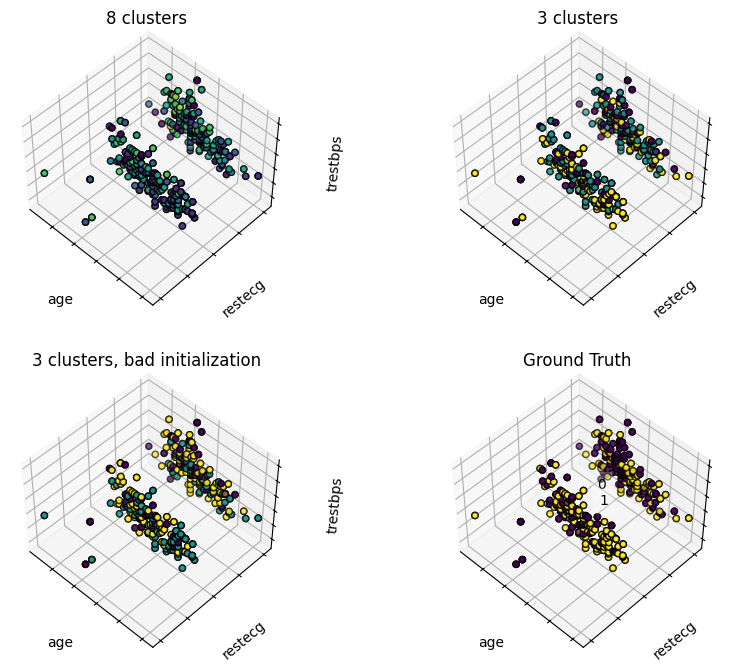

In [54]:
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["age"], X["restecg"], X["trestbps"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("age")
    ax.set_ylabel("restecg")
    ax.set_zlabel("trestbps")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = dataset[dataset["target"]==name]
    ax.text3D(
        ds["age"].mean(),
        ds["restecg"].mean(),
        ds["trestbps"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["age"], X["restecg"], X["trestbps"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("age")
ax.set_ylabel("restecg")
ax.set_zlabel("trestbps")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

#Метрики

In [55]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [56]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

best_metric

[4,
 0.24901270972871223,
 0.05086413576300954,
 array([[5.83796992e+01, 6.95488722e-01, 8.27067669e-01, 1.37037594e+02,
         2.66966165e+02, 1.87969925e-01, 3.27067669e-01, 1.33518797e+02,
         4.47368421e-01, 1.25187970e+00, 1.16541353e+00, 9.39849624e-01,
         2.45864662e+00],
        [5.34031008e+01, 7.86821705e-01, 9.14728682e-01, 1.29531008e+02,
         1.89360465e+02, 1.39534884e-01, 6.08527132e-01, 1.43205426e+02,
         3.64341085e-01, 1.24069767e+00, 1.32558140e+00, 7.17054264e-01,
         2.19767442e+00],
        [5.62378049e+01, 5.18292683e-01, 7.19512195e-01, 1.33878049e+02,
         3.29128049e+02, 1.28048780e-01, 5.73170732e-01, 1.52298780e+02,
         3.71951220e-01, 1.16890244e+00, 1.50000000e+00, 8.10975610e-01,
         2.37195122e+00],
        [5.12314540e+01, 7.12166172e-01, 1.16320475e+00, 1.27818991e+02,
         2.32359050e+02, 1.36498516e-01, 6.08308605e-01, 1.64397626e+02,
         2.10682493e-01, 7.52225519e-01, 1.54896142e+00, 6.08308605e-01

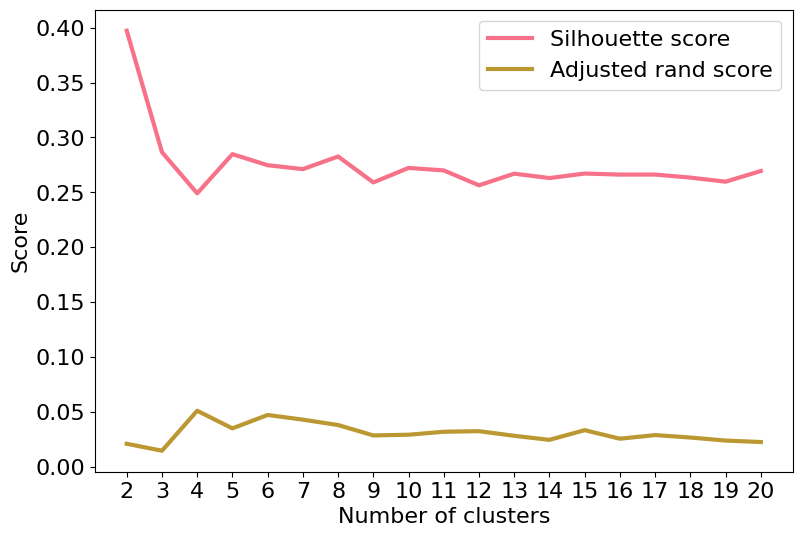

In [57]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

#Иерархическая кластеризация

In [58]:
from scipy.cluster.hierarchy import linkage, dendrogram

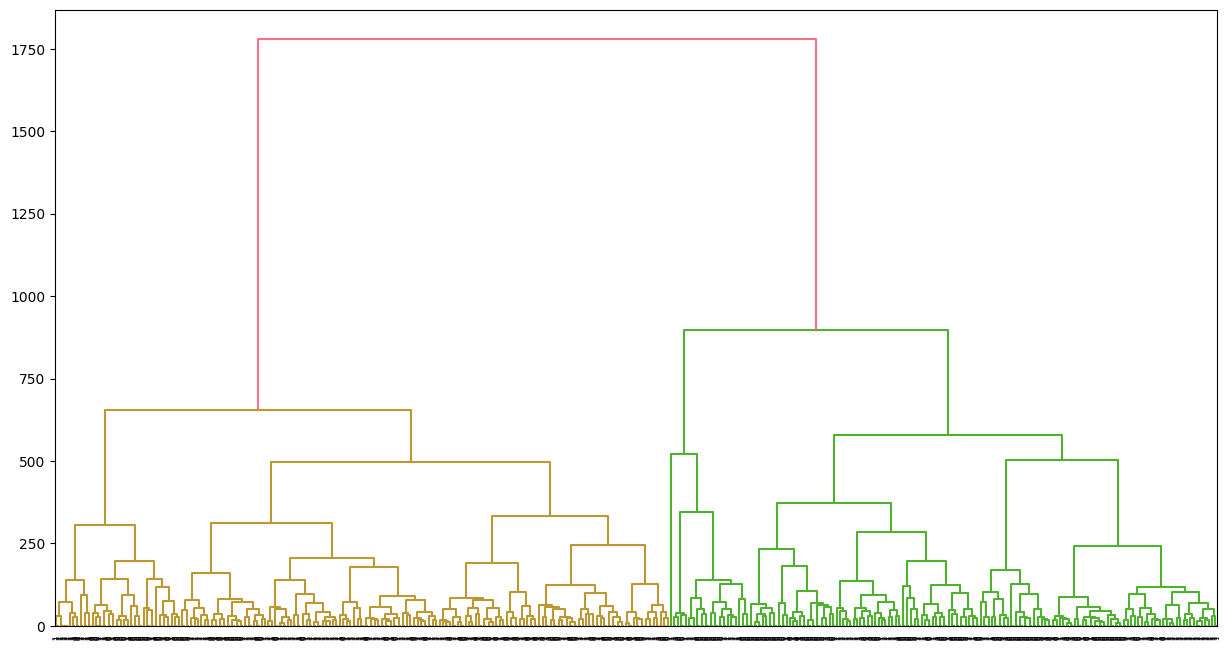

In [59]:
samples = df.values

mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))

dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

#DBSCAN

In [60]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [90]:
mins = X.shape[1]
mins

13

In [91]:
db = DBSCAN(eps=0.5, min_samples=mins).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

labels

array([-1, -1, -1, ..., -1, -1, -1])

In [92]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

0

['y', 'b', 'g', 'r']


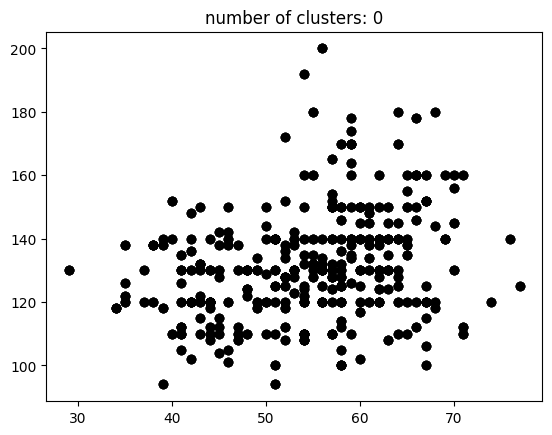

In [93]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["age"], xy["trestbps"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["age"], xy["trestbps"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

Повысил eps и уменьшил min_samples, чтобы не все значения считались выбросами (-1)

In [125]:
db = DBSCAN(eps=0.5, min_samples=1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

labels

array([  0,   1,   2, ...,  91, 278, 301])

In [126]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

302

['y', 'b', 'g', 'r']


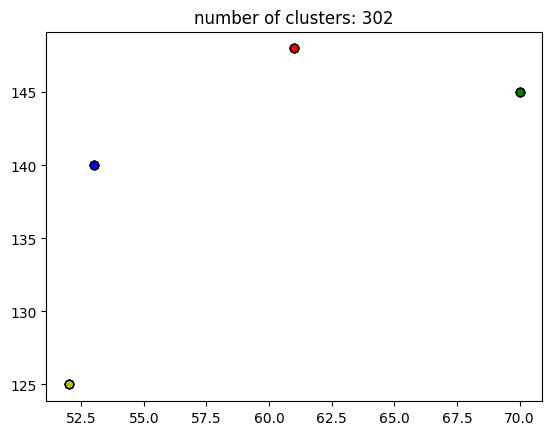

In [120]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["age"], xy["trestbps"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["age"], xy["trestbps"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [127]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:1.00
Adjusted Rand Index: 0.00


In [129]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

По моему так тоже не должно быть

['y', 'b', 'g', 'r']


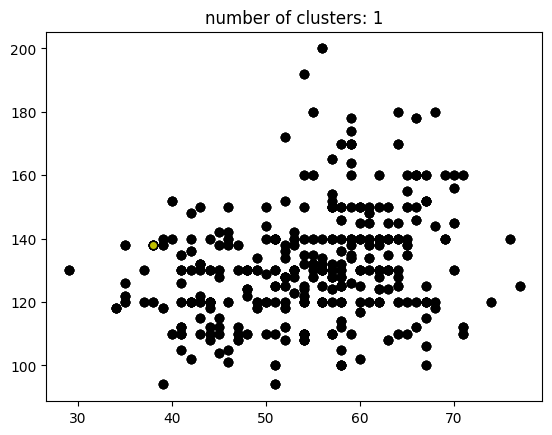

In [130]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["age"], xy["trestbps"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["age"], xy["trestbps"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [131]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.09
Adjusted Rand Index: -0.00


Тоже плохой результат

In [128]:
db = DBSCAN(eps=0.5, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

labels

array([-1, -1, -1, ..., -1, -1, -1])

In [121]:
db = DBSCAN(eps=0.5, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

labels

array([ 0,  1,  2, ..., 45, -1, -1])

In [122]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

115

['y', 'b', 'g', 'r']


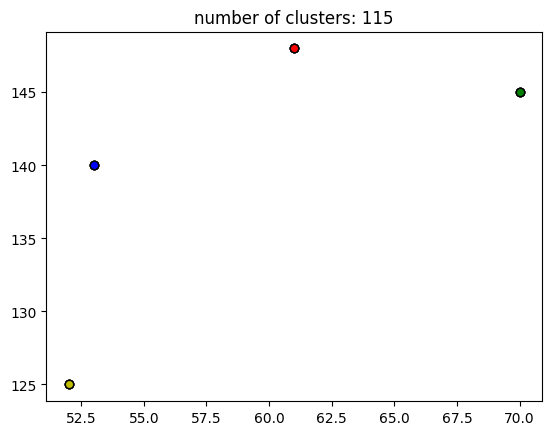

In [113]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["age"], xy["trestbps"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["age"], xy["trestbps"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [123]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.03
Adjusted Rand Index: 0.11


Тоже плохие коэффициенты, изменение eps ситуацию не улучшает

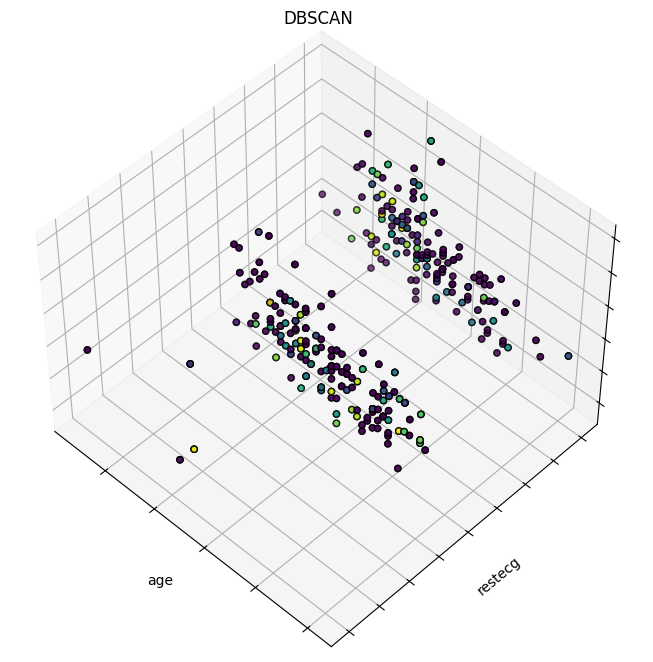

In [114]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["age"], X["restecg"], X["trestbps"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("age")
ax.set_ylabel("restecg")
ax.set_zlabel("trestbps")
ax.set_title("DBSCAN")

plt.show()

In [112]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.03
Adjusted Rand Index: 0.11
